In [20]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


tc="TSLA"
start = datetime.datetime(2016,1,1)
end   = datetime.datetime(2021,2,20)

data = web.DataReader(tc,'yahoo',start,end)

SP500 = web.DataReader("SPY",'yahoo',start,end).Close #收盘价

SP500_return = SP500.pct_change().dropna()   # 计算日收益率
#SP500_return1= (SP500['Close']/SP500['Close'].shift(1)) - 1

#SP500_return2= (SP500['Close'].pct_change().fillna(0) 
#SP500_return3= (SP500['Close'].pct_change().dropna()   # 计算日收益率





SP500_return.name = 'SP500_return'   

In [21]:
SP500

Date
2015-12-31    203.869995
2016-01-04    201.020004
2016-01-05    201.360001
2016-01-06    198.820007
2016-01-07    194.050003
                 ...    
2021-02-12    392.640015
2021-02-16    392.299988
2021-02-17    392.390015
2021-02-18    390.720001
2021-02-19    390.029999
Name: Close, Length: 1293, dtype: float64

In [22]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,48.689999,47.674000,47.702000,48.001999,13575000.0,48.001999
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
...,...,...,...,...,...,...
2021-02-12,817.330017,785.330017,801.260010,816.119995,23768300.0,816.119995
2021-02-16,821.000000,792.440002,818.000000,796.219971,19802300.0,796.219971
2021-02-17,799.840027,762.010010,779.090027,798.150024,25996500.0,798.150024


计算日收益率三种方法

SP500_return1= (SP500['Close']/SP500['Close'].shift(1)) - 1

SP500_return2= (SP500['Close'].pct_change().fillna(0) 


SP500_return3= (SP500['Close'].pct_change().dropna()   # 计算日收益率

In [23]:
SP500_return.head()

Date
2016-01-04   -0.013979
2016-01-05    0.001691
2016-01-06   -0.012614
2016-01-07   -0.023992
2016-01-08   -0.010977
Name: SP500_return, dtype: float64

# 波动率特性

In [24]:
import pandas as pd
import seaborn as sns

from matplotlib.patches import Rectangle
import matplotlib.dates as md


from datetime import datetime


In [25]:
# 定义作图辅助函数
def date2num(date: str):
    """
    将日期字符串转化为matplotlib可用的数值
    """
    return md.date2num(datetime.strptime(date,'%Y-%m-%d'))

def add_marks(time_periods, ax):
    """
    在ax子图上为time_period传入的时间范围添加背景颜色
    param time_periods: 需要添加标记的时间范围列表，列表元素为(start, end)组成的元组
    param ax: 需要添加标记的子图
    """
    bottom, top = ax.get_ylim()
    height = top - bottom
    for start_date, end_date in time_periods:
        start = date2num(start_date)
        end = date2num(end_date)
        width = end - start
        rect = Rectangle((start, bottom), width, height, color='y', fill=True, alpha=0.7)
        ax.add_patch(rect)

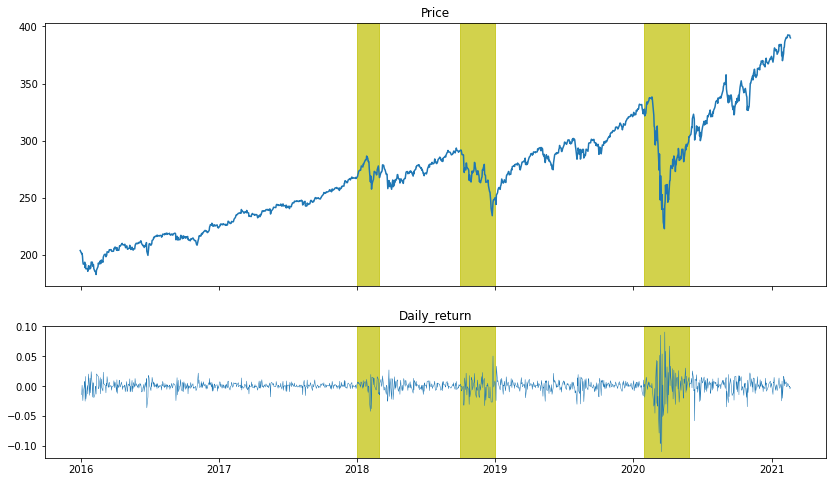

In [26]:
# 对价格和日收益率作图
f, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[5,2.5]}, sharex=True)
f.set_size_inches(14, 8)

ax0.plot(SP500)
ax0.set_title('Price')
ax1.plot(SP500_return, linewidth=0.5)
ax1.set_title('Daily_return')

periods = [('2018-1-01', '2018-2-28'),('2018-9-29', '2018-12-31'),('2020-01-29', '2020-5-27'), ]


# 在图上添加高亮区域
add_marks(periods, ax0)
add_marks(periods, ax1)

plt.show()

波动率的特征：
* 聚集效应（cluster）：大波动率后容易出现大波动率，小波动率后容易出现小波动率
* 杠杆效应（leverage）：即波动率的不对称性，价格上涨过程波动率小，价格下跌过程波动率大

# ARCH 模型

资产收益率可以被分解为均值和波动两部分：

$r_t = \eta_t + \epsilon_t$


其中:

$\epsilon_t = \sigma_t z_t $

$z_t \sim i.i.d.(0,1) $


ARCH (autoregressive conditional heteroskedasticity) 模型使用延迟残差项$\epsilon_t$对波动率建模：


$\displaystyle \sigma_t^2 = \alpha_0 + \sum_{i=1}^m \alpha_i \epsilon_{t-i}^2$

或表示为 ARCH(m)，其中m是用到的延迟残差项的数量。

当残差的方差呈现自回归效应时，适合用ARCH模型建模，ARCH模型可以解释波动率的聚集效应。

# GARCH 模型

如果假设残差的方差服从ARMA（自回归移动平均模型）时，就得到GARCH (generalized autoregressive conditional heteroskedasticity) 模型。

GARCH(m,n)模型：

$\displaystyle \sigma_t^2 = \alpha_0 + \sum_{i=1}^m\alpha_i\epsilon_{t-i}^2 + \sum_{i=1}^n\beta_i\sigma_{t-i}^2$

GARCH 模型可以理解为波动率同时受到前m个残差和前n个波动率的影响。

当m和n同时取1时就退化为 GARCH(1,1)模型：

$\sigma_t^2 = \alpha_0 + \alpha_1\epsilon_{t-1}^2 + \beta_1\sigma_{t-1}^2$





### 模拟GARCH过程

假设 $z_t \sim N(0,1)$, $\displaystyle \sigma_0 = \sqrt{\frac{\alpha_0}{1-\alpha_1 - \beta_1}}$

In [27]:
# 参数设置
a0 = 0.06
a1 = 0.1
b1 = 0.8
sigma0 = np.sqrt(a0/(1-a1-b1))
sigma0

0.7745966692414834

In [28]:
from random import gauss   #Random Gaussian Values

In [29]:
# 定义函数模拟GARCH过程
def GARCH(a0, a1, b1, sigma0, T):
    """
    模拟一个T步的GARCH过程
    params a0, a1, b1: 对应GARCH(1,1)过程中的（omega, alpha, beta)
    params sigma0: 初始波动率
    params T: 模拟的总步数
    return: 返回模拟的波动率路径
    """
    sigma = [sigma0, ]
    for i in range(1, T+1):
        e = gauss(0, 1)
        sigma_next = np.sqrt(a0 + a1*(e*sigma[-1])**2 + b1*sigma[-1]**2)
        sigma.append(sigma_next)
    return np.array(sigma[1:])

GARCH(a0, a1, b1, sigma0, 100)

array([0.73491429, 0.73396556, 0.70302624, 0.79058445, 0.76087812,
       0.7577897 , 0.76318758, 0.7278299 , 0.71204712, 0.68687818,
       0.75864984, 0.72168452, 0.69429472, 0.67740364, 0.69839465,
       0.71469075, 0.70730724, 0.69137629, 0.70921419, 0.68498615,
       0.6806349 , 0.69659196, 0.66953859, 0.65568913, 0.63982989,
       0.68556477, 0.66562606, 0.68242081, 0.65810514, 0.63960018,
       0.6568112 , 0.67390329, 0.68181189, 0.69633367, 0.71187745,
       0.91660268, 0.85566611, 0.80362646, 0.87202784, 0.86229944,
       0.87995936, 0.83018637, 0.78563446, 0.75243021, 0.74233312,
       0.71463786, 0.68521834, 0.66004397, 0.70663952, 0.6808067 ,
       0.65635648, 0.63613719, 0.67258543, 0.66834804, 0.66201144,
       0.68313934, 0.6744938 , 0.65153267, 0.6367946 , 0.64328956,
       0.62680307, 0.61453283, 0.62992176, 0.62301603, 0.60885253,
       0.6081409 , 0.59909583, 0.63482475, 0.64505187, 0.62965813,
       0.6356678 , 0.63569311, 0.65186024, 0.64317991, 0.77681

In [30]:
# 模拟一个GARCH
sigma = GARCH(a0, a1, b1, sigma0, 2000)[200:]
sigma

array([0.69554975, 0.77019901, 0.83937483, ..., 0.67193266, 0.64931318,
       0.64443096])

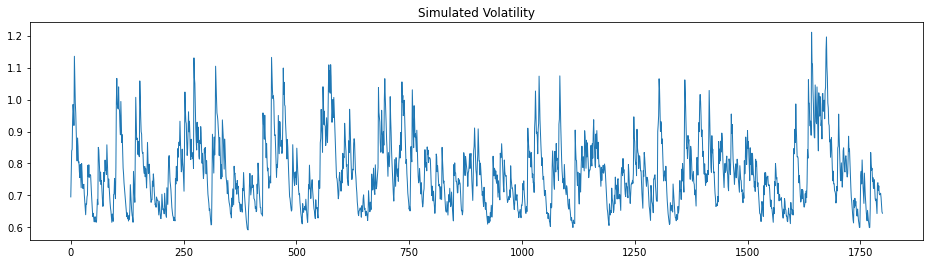

In [31]:
# 图形输出模拟波动率
plt.figure(figsize=(16,4))
fig = plt.plot(sigma, linewidth=1)
plt.title('Simulated Volatility')
plt.show()

### 拟合 GARCH(1,1) 模型

使用arch库进行GARCH模型拟合。使用前需要先安装arch库，命令行安装方法：pip install arch

arch官方文档：https://arch.readthedocs.io/en/latest/univariate/introduction.html

In [32]:
from arch.univariate import arch_model

In [33]:
# 将收益率数据分列为训练数据和测试数据两部分
train = SP500_return[:'2019'].dropna()
test = SP500_return['2019':].dropna()
train.tail()

Date
2019-12-24    0.000031
2019-12-26    0.005323
2019-12-27   -0.000248
2019-12-30   -0.005513
2019-12-31    0.002429
Name: SP500_return, dtype: float64

In [34]:
# 构造并拟合一个GARCH(1,1)模型
garch = arch_model(train*100, mean='zero', p=1, o=0, q=1)  # 收益乘以100，避免数字太小造成的模型不稳定
res = garch.fit(disp='off')                              
print(res.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:           SP500_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1065.18
Distribution:                  Normal   AIC:                           2136.35
Method:            Maximum Likelihood   BIC:                           2151.09
                                        No. Observations:                 1006
Date:                Fri, May 06 2022   Df Residuals:                     1006
Time:                        23:17:31   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0400  1.196e-02      3.347  8.165e-04 [1.

In [35]:
# 从拟合结果中提取条件波动率
con_vol = res.conditional_volatility
con_vol 

Date
2016-01-04    1.341686
2016-01-05    1.326534
2016-01-06    1.168268
2016-01-07    1.168160
2016-01-08    1.467247
                ...   
2019-12-24    0.488502
2019-12-26    0.467929
2019-12-27    0.507785
2019-12-30    0.483194
2019-12-31    0.522138
Name: cond_vol, Length: 1006, dtype: float64

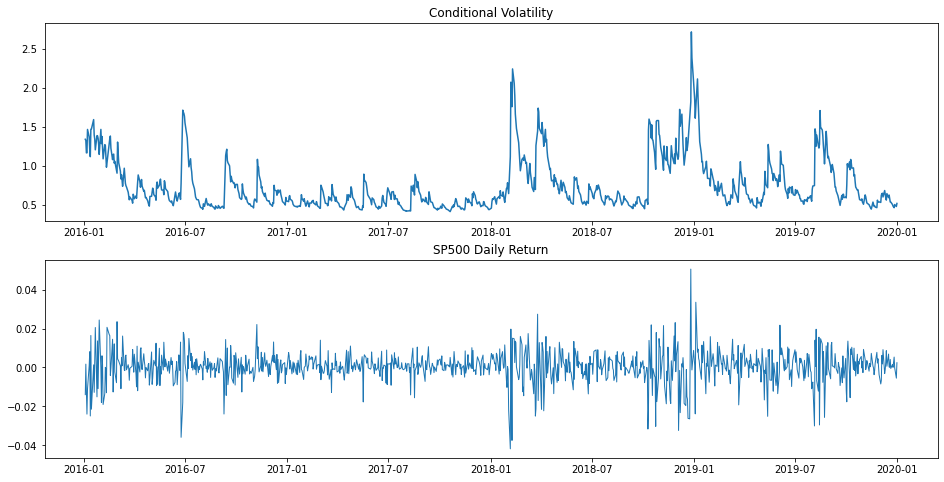

In [36]:
# 比较条件波动率和真实收益率数据的图像
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(16,8)
ax1.plot(con_vol['2016':])
ax1.set_title('Conditional Volatility')
ax2.plot(train['2016':], lw=1)
ax2.set_title('SP500 Daily Return')
plt.show()

In [37]:
# 使用拟合的模型进行样本内预测
forecasts = res.forecast(horizon=1, start=train.index[0])                 # horizon是预测的步数
train_df = pd.concat([forecasts.mean, forecasts.variance**0.5], axis=1)   # 提取模型预测的均值和方差
train_df.columns =['mu', 'sigma']
train_df.tail()

c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


,mu,sigma
Date,,
2019-12-24,0.0,0.467929
2019-12-26,0.0,0.507785
2019-12-27,0.0,0.483194
2019-12-30,0.0,0.522138
2019-12-31,0.0,0.505585


In [38]:
train_df

,mu,sigma
Date,,
2016-01-04,0.0,1.326534
2016-01-05,0.0,1.168268
2016-01-06,0.0,1.168160
2016-01-07,0.0,1.467247
2016-01-08,0.0,1.371960
...,...,...
2019-12-24,0.0,0.467929
2019-12-26,0.0,0.507785
2019-12-27,0.0,0.483194


In [39]:
from matplotlib.patches import Rectangle
import matplotlib.dates as md



In [40]:
train_df['z'] = np.random.normal(0, 1, len(SP500)-287)
train_df.tail()

,mu,sigma,z
Date,,,
2019-12-24,0.0,0.467929,-1.825749
2019-12-26,0.0,0.507785,-0.388668
2019-12-27,0.0,0.483194,-0.901181
2019-12-30,0.0,0.522138,0.282704
2019-12-31,0.0,0.505585,0.254679


In [41]:
#SP500[mu]

根据预测的均值和方差计算预测收益率：$r_t = \mu_t + \sigma_t z_t$

In [42]:
# 根据预测的均值和方差计算预测收益率
train_df['z'] = np.random.normal(0, 1, len(train_df))
train_df['r_hat'] = (train_df.mu + train_df.sigma*train_df.z)/100     # 需要除以100， 因为模型拟合过程中使用的是daily_return*100
train_df.head()

,mu,sigma,z,r_hat
Date,,,,
2016-01-04,0.0,1.326534,-0.470463,-0.006241
2016-01-05,0.0,1.168268,-2.231979,-0.026075
2016-01-06,0.0,1.168160,1.269842,0.014834
2016-01-07,0.0,1.467247,1.149395,0.016864
2016-01-08,0.0,1.371960,-0.641073,-0.008795


In [43]:
# 在测试数据上使用拟合好的模型
test_df = pd.DataFrame(test)
test_df['volatility_pre'] = (test_df.SP500_return*100).rolling(60).std().shift(1)   # 前一天的滚动波动率
test_df.dropna(inplace=True)
test_df.head()

,SP500_return,volatility_pre
Date,,
2019-03-29,0.006306,0.851330
2019-04-01,0.011859,0.853064
2019-04-02,0.000490,0.791501
2019-04-03,0.001574,0.680441
2019-04-04,0.002653,0.676223


In [44]:
# 拟合模型得到的参数
res.params

omega       0.040030
alpha[1]    0.189303
beta[1]     0.749793
Name: params, dtype: float64

In [45]:
# 从拟合模型中提取参数
omega, alpha, beta = res.params
f'mu：0, omega: {omega:.4f}, alpha: {alpha:4f}, beta: {beta:.4f}'

'mu：0, omega: 0.0400, alpha: 0.189303, beta: 0.7498'

In [46]:
# 使用拟合的参数和之前定义的模拟函数预测下一个波动率
GARCH(omega, alpha, beta, 0.54, 1)

array([0.63204014])

In [47]:
# 根据前一天的滚动波动率计算下一天的预测波动率
test_df['volatility_est'] = test_df.volatility_pre.map(lambda v: GARCH(omega, alpha, beta, v, 1)[-1])
# 根据预测波动率计算预测收益率
test_df['return_est'] = (0 + test_df.volatility_est * np.random.normal(0,1, len(test_df)))/100
test_df.head()

,SP500_return,volatility_pre,volatility_est,return_est
Date,,,,
2019-03-29,0.006306,0.851330,0.776702,-0.005129
2019-04-01,0.011859,0.853064,1.020612,0.016853
2019-04-02,0.000490,0.791501,0.811188,0.004135
2019-04-03,0.001574,0.680441,0.622418,0.008216
2019-04-04,0.002653,0.676223,0.679921,0.000572


C:\Users\yuany\AppData\Local\Temp\ipykernel_13960\2328663864.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test_df['2020'].return_est.plot(c='aqua', alpha=0.5, legend=True)


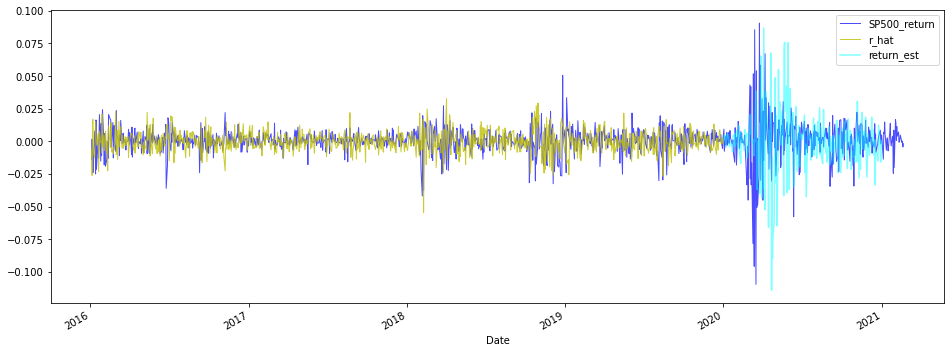

In [48]:
# 比较样本外预测结果与真实的收益率
SP500_return['2016':].plot(figsize=(16,6), c='b', alpha=0.7, lw=1, legend=True)
train_df['2016':].r_hat.plot(c='y', alpha=0.8, lw=1, legend=True)
test_df['2020'].return_est.plot(c='aqua', alpha=0.5, legend=True)
plt.show()